# Lab 5: LHC Particle Physics Data Analysis

**Author:** Alex Feucht

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Explore LHC particle physics data and optimize discovery significance through event selection

In this lab, you will work with realistic particle physics data from the Large Hadron Collider (LHC). The goal is to identify Higgs boson signals from QCD background noise using jet substructure analysis and cut-based optimization.

## Dataset Information

Two pT (transverse momentum) ranges are provided:

### Low pT (250-500 GeV/c): `Sample_pt_250_500`
- **Training samples:**
  - `higgs_100000_pt_250_500.pkl` (Expected yields: N_higgs = 100)
  - `qcd_100000_pt_250_500.pkl` (Expected yields: N_qcd = 20,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_250_500.h5`
  - `data_lowLumi_pt_250_500.h5`

### High pT (1000-1200 GeV/c): `Sample_pt_1000_1200`
- **Training samples:**
  - `higgs_100000_pt_1000_1200.pkl` (Expected yields: N_higgs = 50)
  - `qcd_100000_pt_1000_1200.pkl` (Expected yields: N_qcd = 2,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_1000_1200.h5`
  - `data_lowLumi_pt_1000_1200.h5`

## Physics Background

### What is a Jet?
A jet is a collection of particles traveling in the same direction, originating from a hard quark or gluon through bremsstrahlung and fragmentation processes.

### Jet Substructure
At high transverse momenta, heavy particles (W, Z, Higgs, top quarks) have collimated decays. Standard jet identification fails because all decay products end up in a single jet. **Jet substructure variables** computed from constituent 4-momenta help distinguish boosted heavy particles with two-pronged decays from QCD jets.

### Key Variables:
- **mass**: Jet invariant mass (GeV)
- **d2**: Jet substructure variable for two-pronged discrimination
- **η (eta)**: Pseudorapidity (geometric quantity related to polar angle)
- **φ (phi)**: Azimuthal angle around the beam

**Extended Reading:**
- ATLAS detector: https://arxiv.org/pdf/1709.04533.pdf
- Jet substructure: https://arxiv.org/abs/1201.0008

## Setup and Data Loading

In [1]:
# TODO: Import required libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# TODO: Load the QCD background data
# Use pickle to load: Sample_pt_250_500/qcd_100000_pt_250_500.pkl
with open('qcd_100000_pt_250_500.pkl', 'rb') as f:
    qcd_data = pickle.load(f)

In [3]:
# TODO: Load the Higgs signal data
# Use pickle to load: Sample_pt_250_500/higgs_100000_pt_250_500.pkl
with open('higgs_100000_pt_250_500.pkl', 'rb') as f:
    higgs_data = pickle.load(f)

In [4]:
# TODO: Explore the data structure
# Print the keys available in the data dictionary
# Print the first few values of 'mass' and 'd2'
print(qcd_data.keys())
print(qcd_data['mass'][:5])
print(qcd_data['d2'][:5])
print(f'size of Higgs dataset: {len(higgs_data)}')
print(f'size of QCD Background dataset: {len(qcd_data)}')

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
0    125.298720
1     88.047054
2     85.794174
3     42.947328
4     59.542227
Name: mass, dtype: float64
0    3.304886
1    2.439089
2    4.118371
3    8.038338
4    6.353842
Name: d2, dtype: float64
size of Higgs dataset: 100000
size of QCD Background dataset: 100000


# Task 1: Visualization (3 points)

Explore the low pT dataset (`Sample_pt_250_500`). Make representative plots of each feature to understand the data structure and characteristics.

## Part (a): Individual Feature Distributions

Create histograms for each available feature in both signal and background datasets.

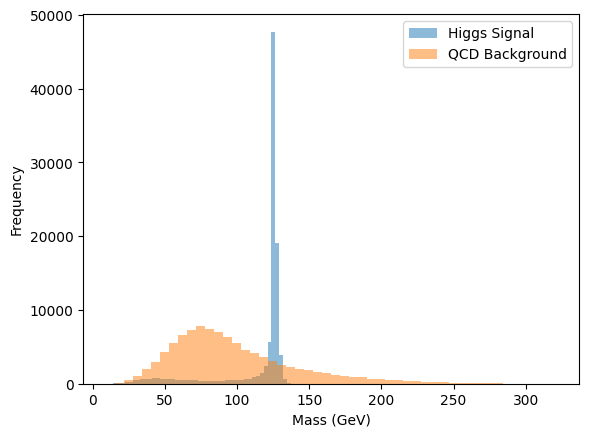

In [5]:
# TODO: Plot mass distributions for signal and background
# Create overlaid histograms with proper labels and legends
plt.hist(higgs_data['mass'], bins=50, alpha=0.5, label='Higgs Signal')
plt.hist(qcd_data['mass'], bins=50, alpha=0.5, label='QCD Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

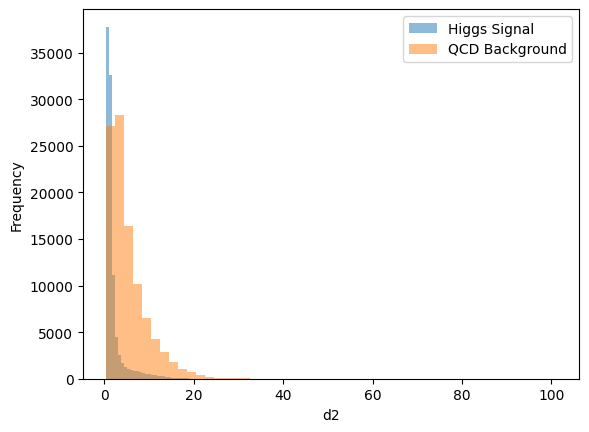

In [6]:
# TODO: Plot d2 distributions for signal and background
plt.hist(higgs_data['d2'], bins=50, alpha=0.5, label='Higgs Signal')
plt.hist(qcd_data['d2'], bins=50, alpha=0.5, label='QCD Background')
plt.xlabel('d2')
plt.ylabel('Frequency')
plt.legend()
plt.show()

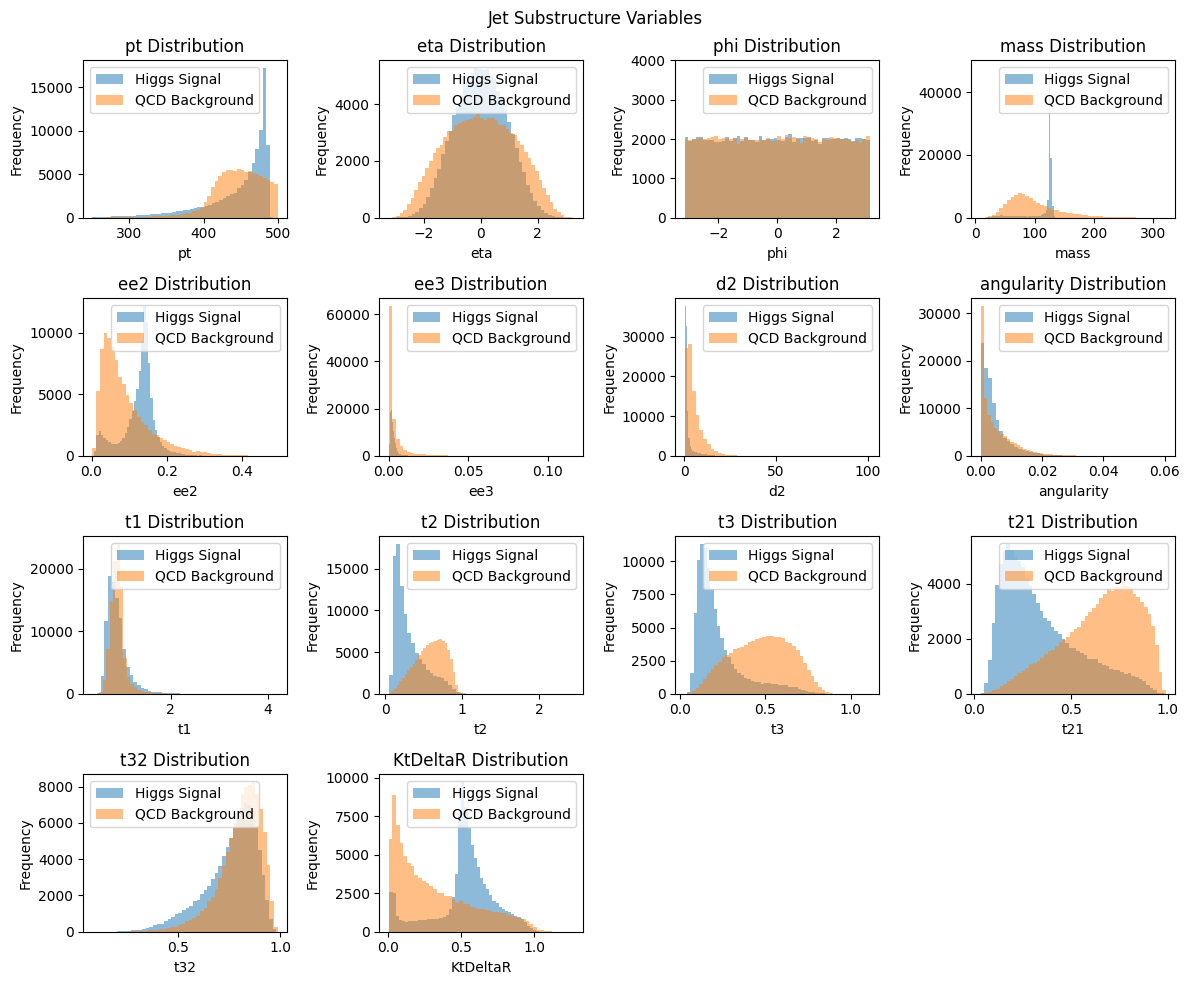

In [7]:
# TODO: Plot other available features (pt, eta, phi, etc.)
# Create a multi-panel figure showing all features

features = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
            't2', 't3', 't21', 't32', 'KtDeltaR']

features_to_plot = [feature for i, feature in enumerate(features)]

n_features = len(features_to_plot)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols # Calculate required number of rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 2.5)) # Adjust figure size based on rows
plt.subplots_adjust(hspace=0.5)

# Flatten the axs array for easy iteration if it's a multi-row grid
if n_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs] # Make it a list if there's only one row

plt.suptitle('Jet Substructure Variables')

# Remove unused axes if the number of subplots is greater than the number of features
if len(axs) > n_features:
    for j in range(n_features, len(axs)):
        fig.delaxes(axs[j]) # Remove unused axes

for i, feature in enumerate(features_to_plot):
    ax = axs[i]
    ax.hist(higgs_data[feature], bins=50, alpha=0.5, label='Higgs Signal')
    ax.hist(qcd_data[feature], bins=50, alpha=0.5, label='QCD Background')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(f'{feature} Distribution')

# Adjust y-axis limit for the phi plot specifically
if 'phi' in features_to_plot:
    phi_index = features_to_plot.index('phi')
    if phi_index < len(axs):
        axs[phi_index].set_ylim(0, 4000)


plt.tight_layout()
plt.show()

## Part (b): Summary Statistics

Calculate and display basic statistics for key features.

In [8]:
# TODO: Calculate mean, std, min, max for mass and d2
mean_mass = np.mean(higgs_data['mass'])
std_mass = np.std(higgs_data['mass'])
min_mass = np.min(higgs_data['mass'])
max_mass = np.max(higgs_data['mass'])

mean_d2 = np.mean(higgs_data['d2'])
std_d2 = np.std(higgs_data['d2'])
min_d2 = np.min(higgs_data['d2'])
max_d2 = np.max(higgs_data['d2'])

print(f"Mean mass: {mean_mass}")
print(f"Standard deviation of mass: {std_mass}")
print(f"Minimum mass: {min_mass}")
print(f"Maximum mass: {max_mass}")

print(f"\nMean d2: {mean_d2}")
print(f"Standard deviation of d2: {std_d2}")
print(f"Minimum d2: {min_d2}")
print(f"Maximum d2: {max_d2}")

Mean mass: 114.8923866455211
Standard deviation of mass: 25.350943376218037
Minimum mass: 8.971221491285528
Maximum mass: 142.43960717193664

Mean d2: 1.966659907556112
Standard deviation of d2: 2.500572380863281
Minimum d2: 0.27514340988789027
Maximum d2: 33.722824368762204


# Task 2: Data Exploration (3 points)

Study correlations between mass and d2 jet substructure variable to build a cut-based analysis.

## Part (a): Distribution Comparison and 2D Scatter Plots

Create mass and d2 distributions, and 2D scatter plots for signal (```'Higgs Signal'```) and background (```'QCD Background'```).

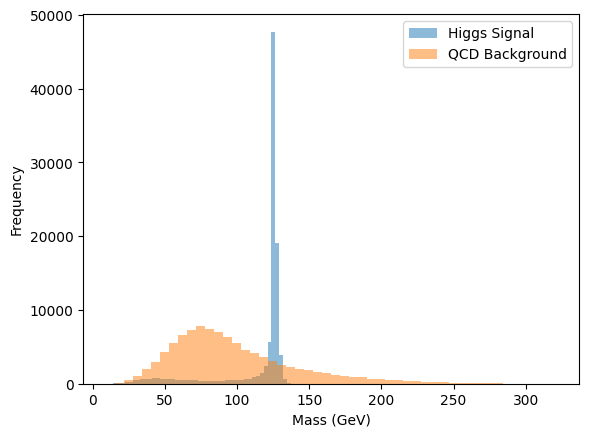

In [9]:
# TODO: Create two plots showing mass distributions (signal vs background)
# Describe the shape and discrimination power
plt.hist(higgs_data['mass'], bins=50, alpha=0.5, label='Higgs Signal')
plt.hist(qcd_data['mass'], bins=50, alpha=0.5, label='QCD Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

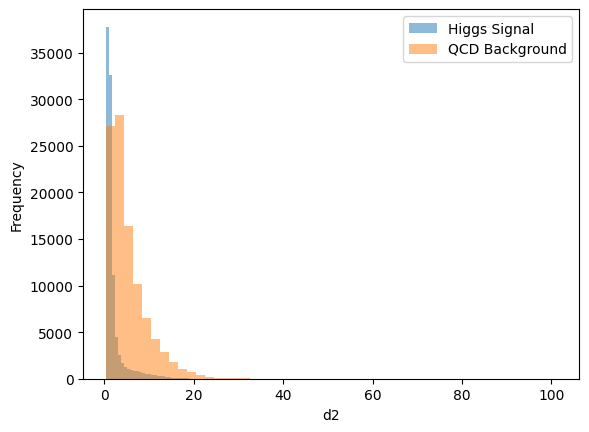

In [10]:
# TODO: Create two plots showing d2 distributions (signal vs background)
# Describe the shape and discrimination power
plt.hist(higgs_data['d2'], bins=50, alpha=0.5, label='Higgs Signal')
plt.hist(qcd_data['d2'], bins=50, alpha=0.5, label='QCD Background')
plt.xlabel('d2')
plt.ylabel('Frequency')
plt.legend()
plt.show()

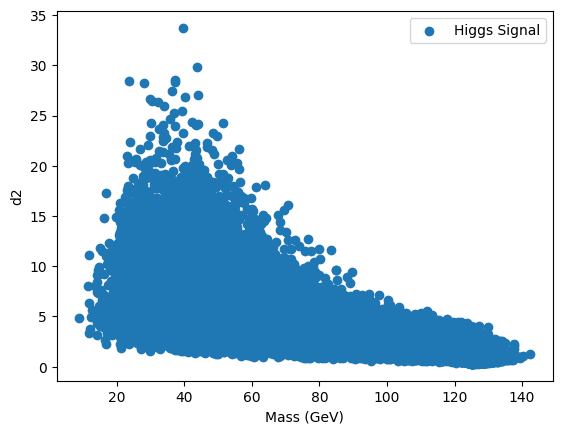

In [11]:
# TODO: Create 2D scatter plot of mass vs d2 for signal
plt.scatter(higgs_data['mass'], higgs_data['d2'], label='Higgs Signal')
plt.xlabel('Mass (GeV)')
plt.ylabel('d2')
plt.legend()
plt.show()

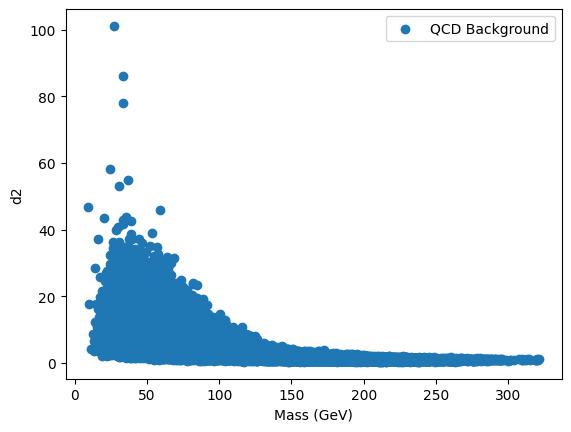

In [12]:
# TODO: Create 2D scatter plot of mass vs d2 for background
plt.scatter(qcd_data['mass'], qcd_data['d2'], label='QCD Background')
plt.xlabel('Mass (GeV)')
plt.ylabel('d2')
plt.legend()
plt.show()

**Question:** Describe the discrimination power of mass and d2 for separating signal from background.

**Your Answer:** In the first of the four plots in this section, Mass vs. count shows a clear distinction between the signal and background distributions in the data, with the signal having a large central spike. In the second plot, d2 vs. count, the distributions are more closer together in terms of their size and profile, with the background being slightly wider than the signal. In the scatters plots, 3 and 4 in this section, the data look very similar, but the d2 vs. mass cluster for the signal occupies a lower mass range than for the background cluster, capping out at around 145-150 GeV vs. over 300 GeV for the background. I would say these parameters offer a fair amount of distinction power when handled appropriately.

## Part (b): Weighted Distributions

Re-weight signal (N_signal = 100) and background (N_background = 20,000) to match expected yields.

In [13]:
# TODO: Calculate weights for signal and background
# N_signal_expected = 100, N_background_expected = 20000
N_signal_expected = 100
N_background_expected = 20000

# Calculate actual number of events
N_signal_actual = len(higgs_data)
N_background_actual = len(qcd_data)

# Calculate event weights
higgs_weight = N_signal_expected / N_signal_actual
qcd_weight = N_background_expected / N_background_actual

# Add weights as a new column to the dataframes
higgs_data['event_weight'] = higgs_weight
qcd_data['event_weight'] = qcd_weight

print(f"Higgs event weight: {higgs_weight}")
print(f"QCD event weight: {qcd_weight}")

Higgs event weight: 0.001
QCD event weight: 0.2


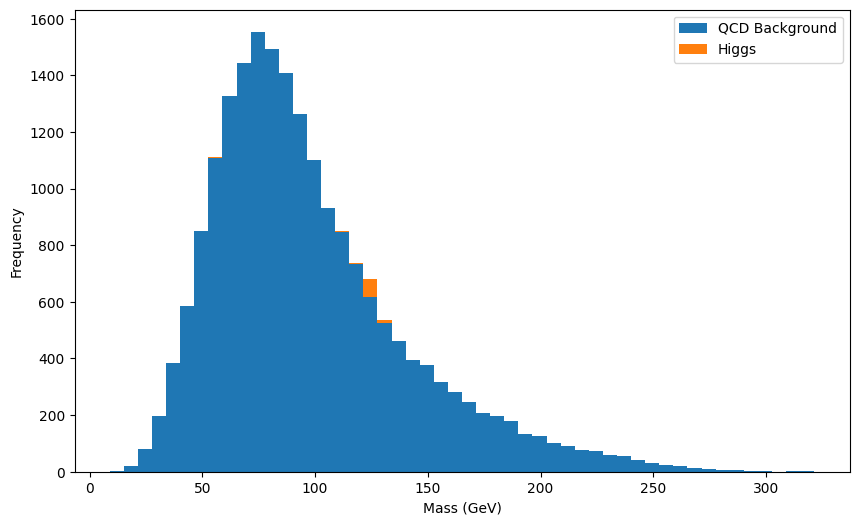

In [14]:
# TODO: Create weighted histograms with signal stacked on background for mass
# Use plt.hist with weights parameter and stacked=True
plt.figure(figsize=(10, 6))
plt.hist([qcd_data['mass'], higgs_data['mass']], bins=50, alpha=1, label=['QCD Background','Higgs'], weights=[qcd_data['event_weight'],higgs_data['event_weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

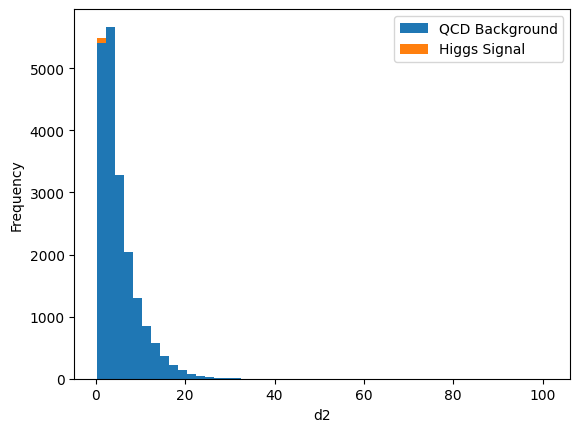

In [15]:
# TODO: Create weighted histograms with signal stacked on background for mass and d2
plt.hist([qcd_data['d2'],higgs_data['d2']], bins=50, alpha=1, label=['QCD Background','Higgs Signal'], weights=[qcd_data['event_weight'],higgs_data['event_weight']], stacked=True)
plt.xlabel('d2')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Question:** Describe the visibility of observing the signal over the background.

**Your Answer:** The signal over the background is a very slight slice of the histogram overlaid on top, a barely visible highlighted orange signal is the contribution that lead to the discovery of the Higgs Boson. This is due to the weighted values applied to each parameter and data which provides a scaling factor over the entire breadth of the dataset. It was a very small statistical bump in the data just looking at it from this angle.

## Part (c): Mass Window Selection

Apply a mass cut of [120, 130] GeV to enhance signal visibility.

In [16]:
# TODO: Apply mass cut [120, 130] GeV
# Create boolean masks for signal and background
mass_cut_mask_higgs = (higgs_data['mass'] >= 120) & (higgs_data['mass'] <= 130)
mass_cut_mask_qcd = (qcd_data['mass'] >= 120) & (qcd_data['mass'] <= 130)

# Apply the mass cut to the dataframes
higgs_data_cut = higgs_data[mass_cut_mask_higgs].copy()
qcd_data_cut = qcd_data[mass_cut_mask_qcd].copy()

print(f"Number of Higgs events after mass cut: {len(higgs_data_cut)}")
print(f"Number of QCD events after mass cut: {len(qcd_data_cut)}")

Number of Higgs events after mass cut: 75847
Number of QCD events after mass cut: 4901


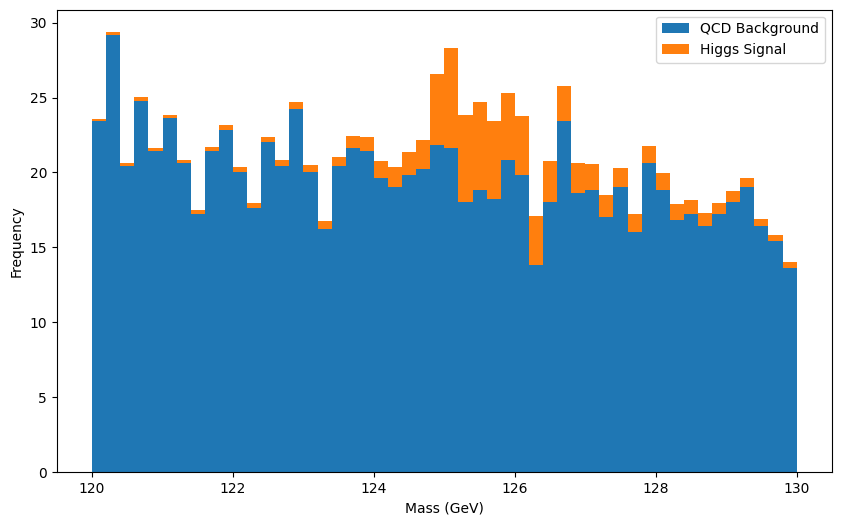

In [17]:
# TODO: Plot weighted mass distributions after the cut
# Does the mass distribution look as expected?
plt.figure(figsize=(10, 6))
plt.hist([qcd_data_cut['mass'], higgs_data_cut['mass']], bins=50, alpha=1, label=['QCD Background','Higgs Signal'], weights=[qcd_data_cut['event_weight'],higgs_data_cut['event_weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

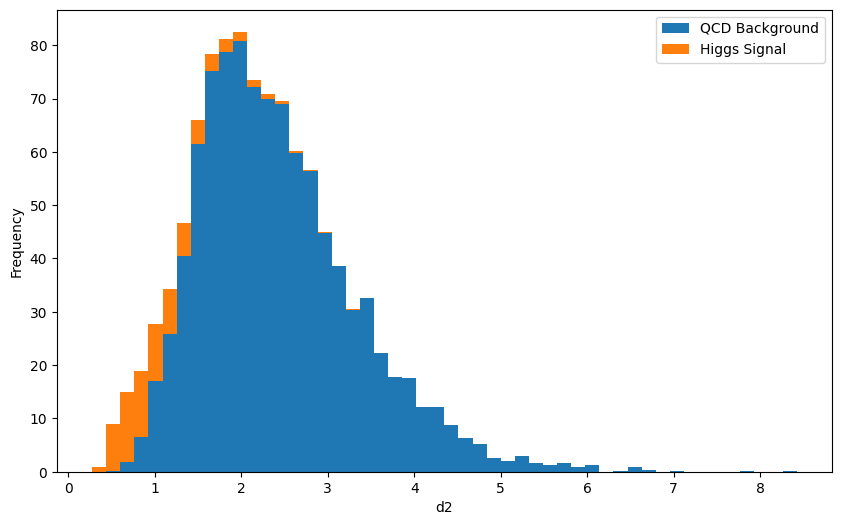

In [18]:
# TODO: Plot weighted d2 distributions after the mass cut
# How does this compare to d2 without any cuts?
plt.figure(figsize=(10, 6))
plt.hist([qcd_data_cut['d2'], higgs_data_cut['d2']], bins=50, alpha=1, label=['QCD Background','Higgs Signal'], weights=[qcd_data_cut['event_weight'],higgs_data_cut['event_weight']], stacked=True)
plt.xlabel('d2')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Question:** How does the d2 plot after mass cut compare to the one without cuts?

**Your Answer:** A lot of the background has been stripped back from the data, and the signal now represents a much higher proportion of the overall histogram compared to the previous plot. Where there was barely a visible slice of orange histogram before, there are now multiple bins of signal all piling up on top of the background.

# Task 3: Significance Optimization (4 points)

Scan over d2 values to find the optimal cut that maximizes discovery significance.

**Significance Formula:** $\text{Significance} = \frac{N_{\text{signal}}}{\sqrt{N_{\text{background}}}}$ (in units of σ)

The goal is to reject as much background as possible while keeping signal to make it more significant.

## Part (a): Understanding d2 Cuts

Inspect the d2 distribution after mass cut to determine the appropriate cut direction.

**Questions to consider:**
1. How does d2 distribution change after applying the mass cut?
2. For a d2 cut value of 4, should you keep events below or above 4?
3. What range should be used to scan d2 cut values?

**Your Answers:**

1) After the mass cut application to the d2 distribution, much more of the signal data is showing, stacked on top of the background. Before, there was barely even a slice that was visible, but the cuts exposed a lot more of the signal in the data after subtracting from some of the background noise. This is a very effective way of isolating out a signal from within a certain mass and d2 window which leaves us with exactly what we wanted to see.

2) Generally a cut value will scan for and keep values from below a cutoff threshold, which is how it is written in the code from this section. Any arbitrary value set for the cut point will see that only data read in from both datasets will be kept when it falls less than that value in the range being scanned for.

3) While the initial range is sort of arbitrary and could basically be any value you wanted to fit data to, normally people using these tools would set some threshold for significance in the data such that a minimum of 3 or 5 sigma is achieved. The cut value could be 4 in this case, or 10, to start, and after plotting the readouts from the cut of the data, it might become clear that a lower range is necessary to highlight only the most significant values, and the cut range can be changed to show that. I ended up starting from 0 to 10 in this section, but after plotting the data, I realized the threshold for significance could be seen clearly between 0.5 and 2.7 in a cut window, so I adjusted it to only scan for those ranges.

## Part (b): d2 Cut Scan

Scan d2 cut values and calculate significance for each cut.

In [19]:
# TODO: Define d2 scan range (e.g., 0 to 10 with fine steps)
range_d2 = np.arange(0.5, 2.7, 0.01) # revised estimate after plotting to best fit 3 sigma

# Initialize lists to store results
significance_values = []
n_signal_cut_values = []
n_background_cut_values = []

# TODO: For each d2 cut value:
#   1. Count signal and background events passing both mass and d2 cuts
#   2. Apply weights to get expected yields
#   3. Calculate significance = N_signal / sqrt(N_background)

# Apply the d2 cut to the mass-cut data
for d2_cut in range_d2:
    d2_cut_mask_higgs = higgs_data_cut['d2'] < d2_cut
    d2_cut_mask_qcd = qcd_data_cut['d2'] < d2_cut

    higgs_data_final = higgs_data_cut[d2_cut_mask_higgs].copy()
    qcd_data_final = qcd_data_cut[d2_cut_mask_qcd].copy()

    # Calculate weighted yields
    n_signal_cut = np.sum(higgs_data_final['event_weight'])
    n_background_cut = np.sum(qcd_data_final['event_weight'])

    # Calculate significance, handle the case where background is zero
    if n_background_cut > 0:
        significance = n_signal_cut / np.sqrt(n_background_cut)
    else:
        significance = 0  # Avoid division by zero

    # Store the results
    significance_values.append(significance)
    n_signal_cut_values.append(n_signal_cut)
    n_background_cut_values.append(n_background_cut)

# TODO: Plot significance vs d2 cut value
# Plotted in cell below for visibility

# Print the maximum significance found and the corresponding d2 cut
max_significance = max(significance_values)
optimal_d2_cut = range_d2[significance_values.index(max_significance)]

print(f"Maximum Significance: {max_significance:.2f}")
print(f"Optimal d2 cut value: {optimal_d2_cut:.2f}")

Maximum Significance: 28.51
Optimal d2 cut value: 0.64


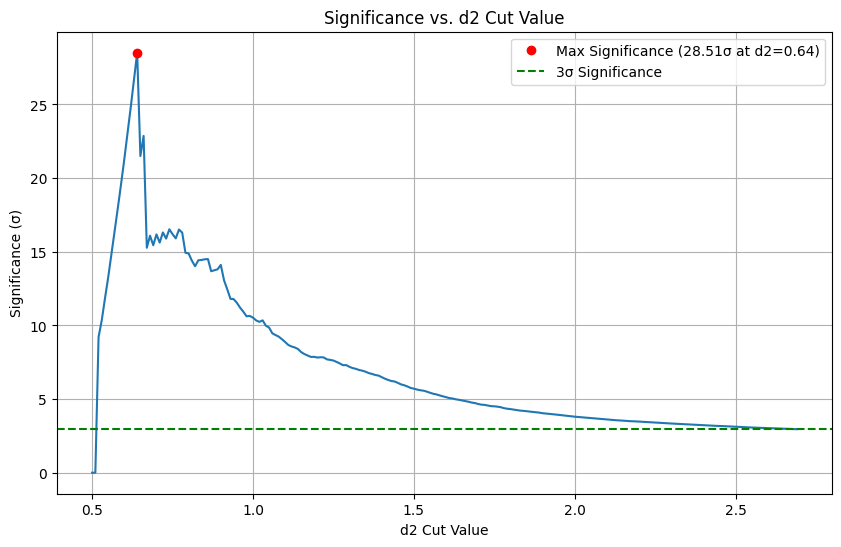

In [20]:
# TODO: Plot significance vs d2 cut value
# Mark the point where significance reaches 3σ
plt.figure(figsize=(10, 6))
plt.plot(range_d2, significance_values)
plt.xlabel('d2 Cut Value')
plt.ylabel('Significance (σ)')
plt.title('Significance vs. d2 Cut Value')
plt.grid(True)

# Mark the maximum significance point
max_significance = max(significance_values)
optimal_d2_cut = range_d2[significance_values.index(max_significance)]
plt.plot(optimal_d2_cut, max_significance, 'ro', label=f'Max Significance ({max_significance:.2f}σ at d2={optimal_d2_cut:.2f})')

# Mark the 3σ significance level
plt.axhline(y=3, color='g', linestyle='--', label='3σ Significance')

plt.legend()
plt.show()

## Part (c): Final Results with Optimal Cuts

Apply both mass and optimal d2 cuts to visualize the final result.

In [21]:
# TODO: Identify optimal d2 cut value (e.g., for 3σ significance)
# Based off the above plot, I estimated the range between d2 = 0.5 and 2.7 for 3 sigma, using 0.01 step size

# TODO: Apply both mass [120, 130] and optimal d2 cuts
final_d2_cut_mask_higgs = higgs_data_cut['d2'] < optimal_d2_cut
final_d2_cut_mask_qcd = qcd_data_cut['d2'] < optimal_d2_cut

higgs_data_final_optimal = higgs_data_cut[final_d2_cut_mask_higgs].copy()
qcd_data_final_optimal = qcd_data_cut[final_d2_cut_mask_qcd].copy()

# TODO: Calculate final significance
n_signal_final_optimal = np.sum(higgs_data_final_optimal['event_weight'])
n_background_final_optimal = np.sum(qcd_data_final_optimal['event_weight'])

final_significance = 0
if n_background_final_optimal > 0:
    final_significance = n_signal_final_optimal / np.sqrt(n_background_final_optimal)

print(f"Number of Higgs events after optimal cuts: {len(higgs_data_final_optimal)}")
print(f"Number of QCD events after optimal cuts: {len(qcd_data_final_optimal)}")
print(f"Final Significance with optimal cuts: {final_significance:.2f}")

Number of Higgs events after optimal cuts: 12751
Number of QCD events after optimal cuts: 1
Final Significance with optimal cuts: 28.51


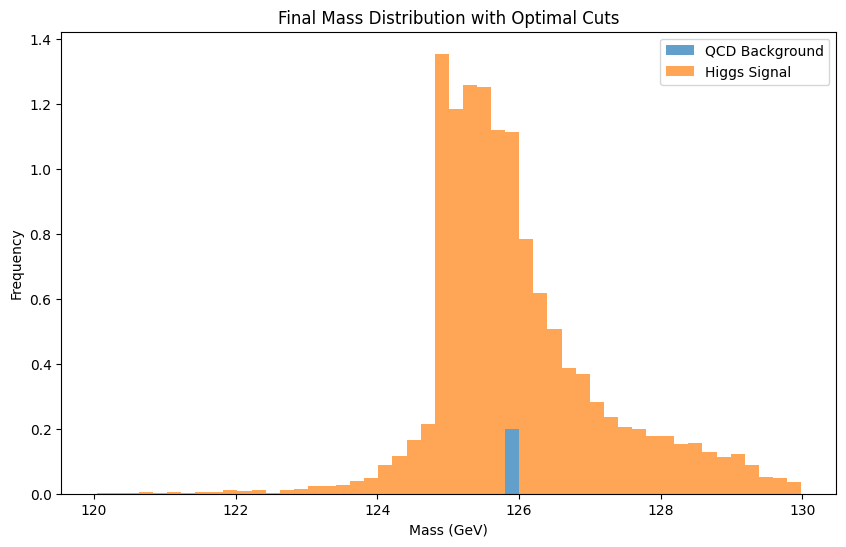

In [22]:
# TODO: Plot final mass distribution with optimal cuts applied
plt.figure(figsize=(10, 6))
plt.hist([qcd_data_final_optimal['mass'], higgs_data_final_optimal['mass']], bins=50, alpha=0.7, label=['QCD Background', 'Higgs Signal'], weights=[qcd_data_final_optimal['event_weight'], higgs_data_final_optimal['event_weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.title('Final Mass Distribution with Optimal Cuts')
plt.legend()
plt.show()

**Question:** What do you observe in the final mass distribution? What is the final significance? How much improvement did you achieve?

**Your Answer:** After applying the optimal set of cuts on the datasets, almost exlusively signal remains, except for a singular background count. I achieved a final significance of 28.51 using these methods to process this data, which is well over the threshold for scientific discovery, meaning there was indeed a new piece of physics present in these datasets after processing them to show it. Compared to the original first few plots from this lab, this has almost entirely isolated out the signal, and I feel like this was a significant increase to the visibility of the signal compared to the background. This would start to resemble a true description of the mass distribution for an individual Higgs particle in the LHC, which could be used to determine properties of the sub-atomic nature of it.

# Bonus: High pT and Multi-Feature Optimization (3 points)

Optimize discovery significance for high pT data (`Sample_pt_1000_1200`) using at least 3 features.

In [23]:
# TODO: Load high pT data
with open('higgs_100000_pt_1000_1200.pkl', 'rb') as f:
    higgs_data_pt_high = pickle.load(f)
with open('qcd_100000_pt_1000_1200.pkl', 'rb') as f:
    qcd_data_pt_high = pickle.load(f)

In [24]:
# TODO: Explore available features
print(higgs_data_pt_high.keys())
print(qcd_data_pt_high.keys())
print(qcd_data_pt_high['mass'][:5])
print(qcd_data_pt_high['d2'][:5])
print(f'size of Higgs dataset: {len(higgs_data_pt_high)}')
print(f'size of QCD Background dataset: {len(qcd_data_pt_high)}')

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
0    272.010881
1    139.794408
2    245.413146
3     89.975916
4     85.893956
Name: mass, dtype: float64
0     3.244343
1     6.481473
2     2.634788
3    13.389845
4    11.342156
Name: d2, dtype: float64
size of Higgs dataset: 100000
size of QCD Background dataset: 100000


In [25]:
# TODO: Implement multi-feature optimization through for loops
# Consider combinations of mass, d2, and other jet substructure variables

# Define scan ranges for mass, d2, and t21 (adjust as needed)
range_mass = np.arange(120, 130, 1) # Example range for mass
range_d2 = np.arange(0.0, 4.0, 0.1) # Example range for d2
range_t21 = np.arange(0.0, 1.0, 0.1) # Example range for t21

best_significance = 0
best_cuts = {}

def calculate_significance(higgs_data, qcd_data, mass_cut_low, mass_cut_high, d2_cut, t21_cut):
    # Apply mass cut
    mass_cut_mask_higgs = (higgs_data['mass'] >= mass_cut_low) & (higgs_data['mass'] <= mass_cut_high)
    mass_cut_mask_qcd = (qcd_data['mass'] >= mass_cut_low) & (qcd_data['mass'] <= mass_cut_high)

    higgs_data_mass_cut = higgs_data[mass_cut_mask_higgs].copy()
    qcd_data_mass_cut = qcd_data[mass_cut_mask_qcd].copy()

    # Apply d2 cut (assuming lower d2 values are more signal-like)
    d2_cut_mask_higgs = higgs_data_mass_cut['d2'] < d2_cut
    d2_cut_mask_qcd = qcd_data_mass_cut['d2'] < d2_cut

    higgs_data_d2_cut = higgs_data_mass_cut[d2_cut_mask_higgs].copy()
    qcd_data_d2_cut = qcd_data_mass_cut[d2_cut_mask_qcd].copy()

    # Apply t21 cut (assuming lower t21 values are more signal-like)
    t21_cut_mask_higgs = higgs_data_d2_cut['t21'] < t21_cut
    t21_cut_mask_qcd = qcd_data_d2_cut['t21'] < t21_cut

    higgs_data_final = higgs_data_d2_cut[t21_cut_mask_higgs].copy()
    qcd_data_final = qcd_data_d2_cut[t21_cut_mask_qcd].copy()

    # Calculate weighted yields
    n_signal_cut = np.sum(higgs_data_final['event_weight'])
    n_background_cut = np.sum(qcd_data_final['event_weight'])

    # Calculate significance, handle the case where background is zero
    significance = 0
    if n_background_cut > 0:
        significance = n_signal_cut / np.sqrt(n_background_cut)

    return significance, n_signal_cut, n_background_cut

# Calculate weights for high pT data (reusing values from section 2.b)
N_signal_expected_high_pt = 100
N_background_expected_high_pt = 20000

N_signal_actual_high_pt = len(higgs_data_pt_high)
N_background_actual_high_pt = len(qcd_data_pt_high)

higgs_weight_high_pt = N_signal_expected_high_pt / N_signal_actual_high_pt
qcd_weight_high_pt = N_background_expected_high_pt / N_background_actual_high_pt

# Add weights as a new column to the high pT dataframes
higgs_data_pt_high['event_weight'] = higgs_weight_high_pt
qcd_data_pt_high['event_weight'] = qcd_weight_high_pt

# Loop over mass, d2, and t21 cuts
for mass_low in range_mass:
    for mass_high in range_mass:
        # Ensure mass_high is greater than mass_low
        if mass_high < mass_low:
            continue

        for d2_cut in range_d2:
           for t21_cut in range_t21:
                significance, n_signal_cut, n_background_cut = calculate_significance(
                    higgs_data_pt_high, qcd_data_pt_high, mass_low, mass_high, d2_cut, t21_cut
                )
                # Diagnostic printout to test brute force is working
                # print(f"Mass: [{mass_low}, {mass_high}], d2: < {d2_cut:.2f}, t21: < {t21_cut:.2f}, "
                #       f"Significance: {significance:.2f}, N_signal: {n_signal_cut:.2f}, N_background: {n_background_cut:.2f}")

                if significance > best_significance:
                    best_significance = significance
                    best_cuts = {'mass_cut_low': mass_low, 'mass_cut_high': mass_high, 'd2_cut': d2_cut, 't21_cut': t21_cut}

print("--- Optimization Results ---")
print(f"Best Significance: {best_significance:.2f}")
print(f"Optimal mass cut: [{best_cuts['mass_cut_low']}, {best_cuts['mass_cut_high']}]")
print(f"Optimal d2 cut: < {best_cuts['d2_cut']:.2f}")
print(f"Optimal t21 cut: < {best_cuts['t21_cut']:.2f}")

--- Optimization Results ---
Best Significance: 45.72
Optimal mass cut: [120, 129]
Optimal d2 cut: < 0.90
Optimal t21 cut: < 0.60


Number of Higgs events after optimal cuts: 20447
Number of QCD events after optimal cuts: 1


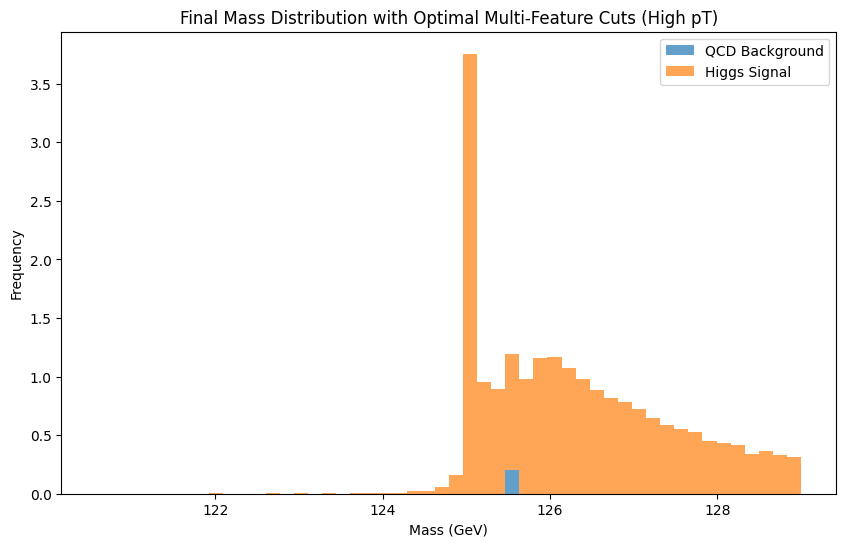

In [29]:
# TODO: Plot final mass distribution with optimal cuts applied
# Show signal stacked on background with optimal cuts

# Apply the optimal cuts to the high pT data
optimal_mass_low = best_cuts['mass_cut_low']
optimal_mass_high = best_cuts['mass_cut_high']
optimal_d2_cut = best_cuts['d2_cut']
optimal_t21_cut = best_cuts['t21_cut']

higgs_data_optimal_cuts = higgs_data_pt_high[
    (higgs_data_pt_high['mass'] >= optimal_mass_low) &
    (higgs_data_pt_high['mass'] <= optimal_mass_high) &
    (higgs_data_pt_high['d2'] < optimal_d2_cut) &
    (higgs_data_pt_high['t21'] < optimal_t21_cut)
].copy()

qcd_data_optimal_cuts = qcd_data_pt_high[
    (qcd_data_pt_high['mass'] >= optimal_mass_low) &
    (qcd_data_pt_high['mass'] <= optimal_mass_high) &
    (qcd_data_pt_high['d2'] < optimal_d2_cut) &
    (qcd_data_pt_high['t21'] < optimal_t21_cut)
].copy()

print(f'Number of Higgs events after optimal cuts: {len(higgs_data_optimal_cuts)}')
print(f'Number of QCD events after optimal cuts: {len(qcd_data_optimal_cuts)}')

plt.figure(figsize=(10, 6))
plt.hist([qcd_data_optimal_cuts['mass'], higgs_data_optimal_cuts['mass']], bins=50, alpha=0.7, label=['QCD Background', 'Higgs Signal'], weights=[qcd_data_optimal_cuts['event_weight'], higgs_data_optimal_cuts['event_weight']], stacked=True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.title('Final Mass Distribution with Optimal Multi-Feature Cuts (High pT)')
plt.legend()
plt.show()

In [30]:
%%shell
jupyter nbconvert --to html /content/lab_5_AlexFeucht.ipynb

[NbConvertApp] Converting notebook /content/lab_5_AlexFeucht.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 933942 bytes to /content/lab_5_AlexFeucht.html
